# Scenarios
To demonstrate the use of this simulator, here is a Jupyter Notebook that performs a three scenarios involving specific tasks.

Before getting started, however, make sure to run the following code block in order to import the necessary packages and classes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from montecarlo.montecarlo import Die, Game, Analyzer

Welcome to my Monte Carlo module.


## Scenario 1: A 2-headed coin

#### 1. Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [2]:
fair_coin = Die(['H', 'T'])
unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5)

#### 2. Play a game of 1000 flips of three coins with all fair dice.

In [3]:
num_rolls = 1000
fair_game = Game([fair_coin, fair_coin, fair_coin])
fair_game.play(num_rolls)

#### 3. Play a game of 1000 flips with two unfair dice and one fair die.

In [4]:
unfair_game = Game([fair_coin, unfair_coin, unfair_coin])
unfair_game.play(num_rolls)

#### 4. For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
##### (5. Compute relative frequency as the number of jackpots over the total number of rolls.)

In [5]:
fair_analyzer = Analyzer(fair_game)
relative_fair_frequency = fair_analyzer.jackpot()/num_rolls
print('Relative fair frequency:', relative_fair_frequency)

Relative fair frequency: 0.244


In [6]:
expected_fair_frequency = 2*(1/2)**3
print('Expected fair frequency:', expected_fair_frequency)

Expected fair frequency: 0.25


In [7]:
unfair_analyzer = Analyzer(unfair_game)
relative_unfair_frequency = unfair_analyzer.jackpot()/num_rolls
print('Relative unfair frequency:', relative_unfair_frequency)

Relative unfair frequency: 0.389


In [8]:
expected_unfair_frequency = (1/2)*(5/6)*(5/6) + (1/2)*(1/6)*(1/6)
print('Expected unfair frequency:', expected_unfair_frequency)

Expected unfair frequency: 0.36111111111111116


#### 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

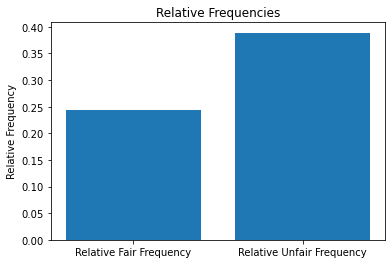

In [9]:
plt.bar(['Relative Fair Frequency', 'Relative Unfair Frequency'], 
        [relative_fair_frequency, relative_unfair_frequency]);
plt.ylabel('Relative Frequency');
plt.title('Relative Frequencies');

## Scenario 2: A 6-sided die

#### 1. Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.

In [10]:
fair_die = Die([1, 2, 3, 4, 5, 6])
unfair_die_type1 = Die([1, 2, 3, 4, 5, 6])
unfair_die_type1.change_weight(6, 5)
unfair_die_type2 = Die([1, 2, 3, 4, 5, 6])
unfair_die_type2.change_weight(1, 5)

#### 2. Play a game of 10000 rolls with 5 fair dice.

In [11]:
num_rolls = 10000
fair_game = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_game.play(num_rolls)

#### 3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.

In [12]:
unfair_game = Game([unfair_die_type1, unfair_die_type1, unfair_die_type2, fair_die, fair_die])
unfair_game.play(num_rolls)

#### 4. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

In [13]:
fair_analyzer = Analyzer(fair_game)
fair_jackpots = fair_analyzer.jackpot()
relative_fair_frequency = fair_jackpots/num_rolls
print('Relative fair frequency:', relative_fair_frequency)
expected_fair_frequency = (1/6)**4
print('Expected fair frequency:', expected_fair_frequency)

Relative fair frequency: 0.0004
Expected fair frequency: 0.0007716049382716048


In [14]:
unfair_analyzer = Analyzer(unfair_game)
unfair_jackpots = unfair_analyzer.jackpot()
relative_unfair_frequency = unfair_jackpots/num_rolls
print('Relative unfair frequency:', relative_unfair_frequency)
expected_unfair_frequency = ((1/10)*(1/10)*(1/2)*(1/6)*(1/6)) + ((1/10)*(1/10)*(1/10)*(1/6)*(1/6)) + \
((1/10)*(1/10)*(1/10)*(1/6)*(1/6)) + ((1/10)*(1/10)*(1/10)*(1/6)*(1/6)) + ((1/10)*(1/10)*(1/10)*(1/6)*(1/6)) + \
((1/2)*(1/2)*(1/10)*(1/6)*(1/6))
print('Expected unfair frequency:', expected_unfair_frequency)

Relative unfair frequency: 0.0008
Expected unfair frequency: 0.0009444444444444444


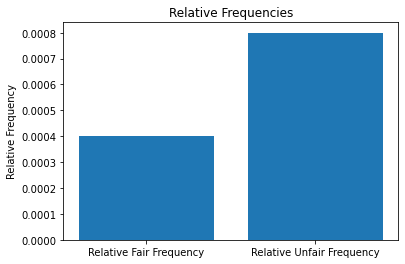

In [15]:
plt.bar(['Relative Fair Frequency', 'Relative Unfair Frequency'], 
        [relative_fair_frequency, relative_unfair_frequency]);
plt.ylabel('Relative Frequency');
plt.title('Relative Frequencies');

#### 5. Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

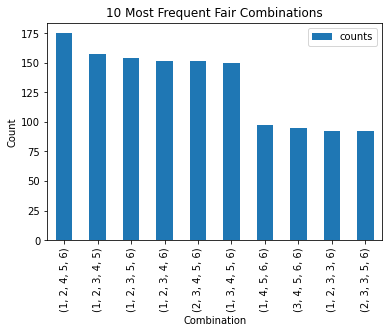

In [16]:
fair_analyzer.combo()
fair_analyzer.combos[:10].plot.bar();
plt.xlabel('Combination');
plt.ylabel('Count');
plt.title('10 Most Frequent Fair Combinations');

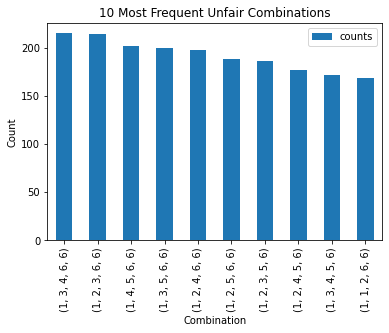

In [17]:
unfair_analyzer.combo()
unfair_analyzer.combos[:10].plot.bar();
plt.xlabel('Combination');
plt.ylabel('Count');
plt.title('10 Most Frequent Unfair Combinations');

## Scenario 3: Letters of the Roman Alphabet

#### 1. Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.

In [18]:
letter_freqs = pd.read_csv('letter-freqs.csv', sep = '\t', header = None)
letters = [letter_freqs.iloc[i][0] for i in range(len(letter_freqs))]
die = Die(letters)
for i in range(len(letter_freqs)):
    die.change_weight(letter_freqs.iloc[i][0], letter_freqs.iloc[i][1])

#### 2. Play a game involving 5 of these dice with 1000 rolls.

In [19]:
num_rolls = 1000
game = Game([die, die, die, die, die])
game.play(num_rolls)

#### 3. How many combos can you that look like actual English words?

In [20]:
words = game.show_result().iloc[:,0] + game.show_result().iloc[:,1] + game.show_result().iloc[:,2] + \
game.show_result().iloc[:,3] + game.show_result().iloc[:,4]
words = words.str.lower()

In [21]:
#import a corpus of five letter words from The Stanford GraphBase to count how many of the randomly generated combos match an element of this dataset
five_letter_words = pd.read_csv('sgb-words.txt', header = None)
actual_word_count = five_letter_words.isin(words.values).sum()[0]
print('Actual English Words:', actual_word_count)

Actual English Words: 1


#### 4. Based on your eye count, what is the relative frequency of these words versus the rest?

In [22]:
relative_word_frequency = actual_word_count/num_rolls
print('Relative Actual Word Frequency:', relative_word_frequency)

Relative Actual Word Frequency: 0.001
